### Import

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from genomic_benchmarks.data_check import info
from genomic_benchmarks.loc2seq import download_dataset

/home/behrooz/anaconda3/envs/snp/lib/python3.11/site-packages/genomic_benchmarks/utils/datasets.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Download Datasets

In [2]:
info("human_enhancers_ensembl", version=0)

Dataset `human_enhancers_ensembl` has 2 classes: negative, positive.

The length of genomic intervals ranges from 2 to 573, with average 268.8641324705183 and median 269.0.

Totally 154842 sequences have been found, 123872 for training and 30970 for testing.


,train,test
negative,61936,15485
positive,61936,15485


In [3]:
# download_dataset("human_enhancers_ensembl", version=0)

### Path

In [4]:
enhancers_train_positive = '/home/behrooz/BehroozDir/UCSD Course/Genomics/Project/Genomics/Data/human_enhancers_ensembl/train/positive/'
enhancers_train_negative = '/home/behrooz/BehroozDir/UCSD Course/Genomics/Project/Genomics/Data/human_enhancers_ensembl/train/negative/'
enhancers_test_positive  = '/home/behrooz/BehroozDir/UCSD Course/Genomics/Project/Genomics/Data/human_enhancers_ensembl/test/positive/'
enhancers_test_negative  = '/home/behrooz/BehroozDir/UCSD Course/Genomics/Project/Genomics/Data/human_enhancers_ensembl/test/negative/'

output_dir = '/home/behrooz/BehroozDir/UCSD Course/Genomics/Project/Genomics/Data/'

### Read DNA

In [5]:
def read_dna_sequences(folder_path, label='positive'):
    
    data = []
    
    for file in os.listdir(folder_path):
        if file.endswith(".txt"):
            file_path = os.path.join(folder_path, file)
            with open(file_path, 'r') as file:
                dna_sequence = file.readline().strip()
                data.append({'seq': dna_sequence})
    
    df = pd.DataFrame(data)
    
    if label == 'positive':
        df['target'] = 1 
    elif label == 'negative':
        df['target'] = 0
        
    df['seq_len'] = df['seq'].apply(len)
     
    return df

### Enhancers

In [6]:
enh_tr_pos = read_dna_sequences(enhancers_train_positive, 'positive')
enh_tr_neg = read_dna_sequences(enhancers_train_negative, 'negative')
enh_ts_pos = read_dna_sequences(enhancers_test_positive , 'positive')
enh_ts_neg = read_dna_sequences(enhancers_test_negative , 'negative')

In [7]:
concat_enh_tr_df = [enh_tr_pos, enh_tr_neg]
concat_enh_ts_df = [enh_ts_pos, enh_ts_neg]

df_enh_train = pd.concat(concat_enh_tr_df)
df_enh_test  = pd.concat(concat_enh_ts_df)

df_enh_train = df_enh_train.reset_index(drop=True)
df_enh_test  = df_enh_test.reset_index(drop=True)

### Sequence Length Plot

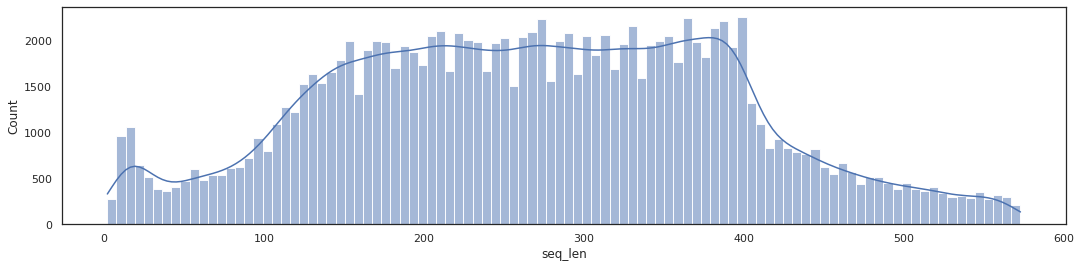

In [8]:
plt.figure(figsize=(18, 4))
sns.set(font_scale= 1)
sns.set_style(style='white')
sns.histplot(data=df_enh_train, x='seq_len', kde=True, stat='count', bins=100, fill=True, legend=True)
plt.show()

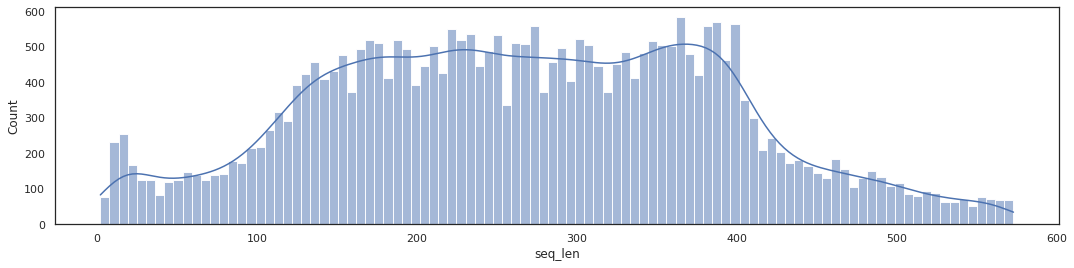

In [9]:
plt.figure(figsize=(18, 4))
sns.set(font_scale= 1)
sns.set_style(style='white')
sns.histplot(data=df_enh_test, x='seq_len', kde=True, stat='count', bins=100, fill=True, legend=True)
plt.show()

### Remove Short Reads

In [10]:
minimum_seq_length = 100

df_enh_train = df_enh_train[df_enh_train.seq_len > minimum_seq_length]
df_enh_test  = df_enh_test[df_enh_test.seq_len   > minimum_seq_length]

### Set Sequence Length

In [11]:
def adjust_dna_sequence_length(dna_sequence):

    desired_length = 400
    
    if len(dna_sequence) > desired_length:
        return dna_sequence[:desired_length]
    else:
        padding_length = desired_length - len(dna_sequence)
        return dna_sequence + 'N' * padding_length

In [12]:
df_enh_train['seq'] = df_enh_train['seq'].apply(adjust_dna_sequence_length)
df_enh_test['seq']  = df_enh_test['seq'].apply(adjust_dna_sequence_length)

In [13]:
df_enh_train = df_enh_train.reset_index(drop=True)
df_enh_test  = df_enh_test.reset_index(drop=True)

In [14]:
df_enh_train.to_csv(output_dir + 'Train_Enhancers.csv', index=False)
df_enh_test.to_csv(output_dir  + 'Test_Enhancers.csv' , index=False)